In [1]:
# YOU CAN IGNORE THIS PART-
# IN THIS CELL TO LIB's ARE INSTALLED AND IMPLEMENTED
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge ngspice-exe  
!conda install -c conda-forge ngspice      
!conda install -c conda-forge ngspice-lib

!pip install pyspice
import os
from Panel_Simulation import Panel_Simulator
from UsefullMiniFunctions import plt_U_I
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import pandas as pd
import numpy as np



def module_discription(waver_per_string=10,
                      string_per_module = 3,
                       I_SC = 5.17, #A
                       shunt_resistance = 50, #Ohm,
                       reverse_leakage_current_1 = 1e-9, #nA,
                       N1 = 2,
                       reverse_leakage_current_2 = 1e-9, #nA,
                       N2 = 1,
                       serial_resistance = 0.001 #Ohm
                      ):
    waver_list = np.ones([string_per_module, waver_per_string, 7])
    waver_list[:, :, 0] = I_SC  # generator_current
    waver_list[:, :, 1] = shunt_resistance
    waver_list[:, :, 2] = reverse_leakage_current_1
    waver_list[:, :, 3] = N1
    waver_list[:, :, 4] = reverse_leakage_current_2
    waver_list[:, :, 5] = N2
    waver_list[:, :, 6] = serial_resistance
    return waver_list

C:\Users\wittmanne\Anaconda3\envs\py39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


start
Bild-Parameter:  0.006
Bild-Parameter:  0.006
Bild-Parameter:  0.006
Bild-Parameter:  0.006
Bild-Parameter:  0.006


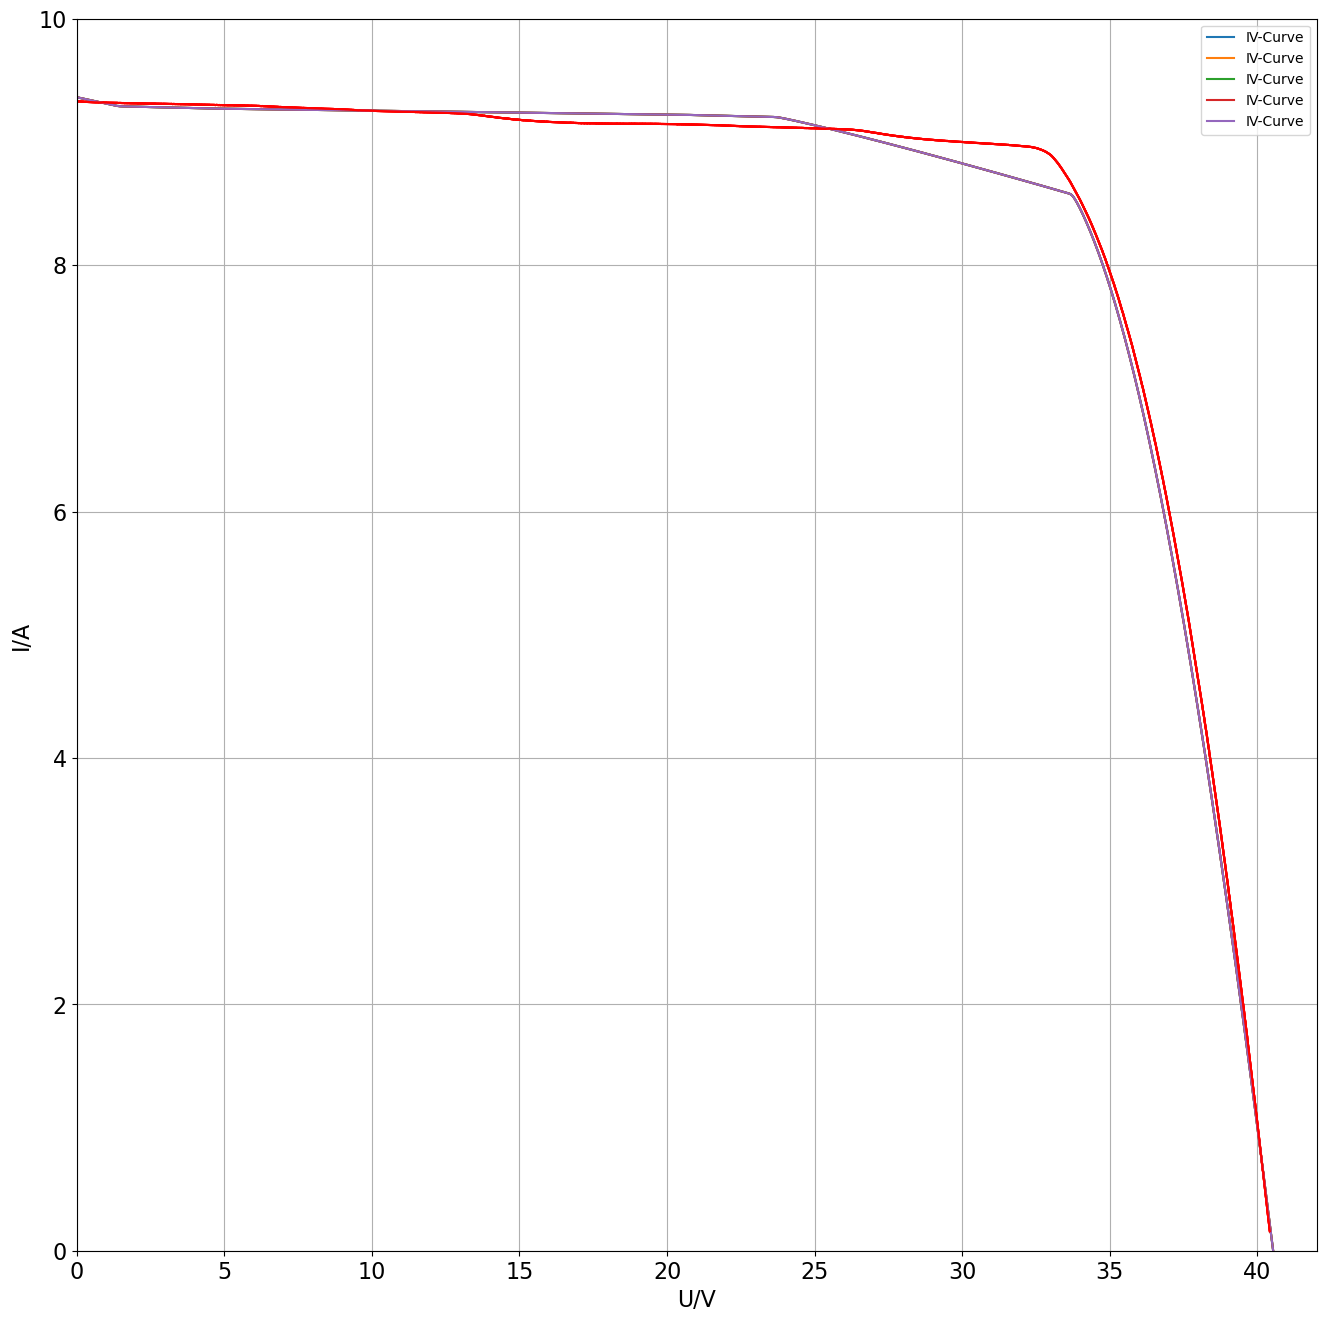

337.6980230083264
0.9962515080444589


In [ ]:
print("start")

#--THIS IS YOUR PART - HAVE FUN-------------------------------------------------------------------------

df = pd.read_csv(r"G:\Praktikum_07-01-2024\823001_1000W.csv") # <- here you need to write done the filename of your measurement
waver_per_string=20       # <- number of cells per substring
string_per_module = 3     # <- number of substrings

I_SC = 9.5                # <- I_SC
reverse_leakage_current1 = 3.6e-11#nA <- defines more or less V_OC (keep in mind Voltage is summed up over all cells)

serial_resistance = 0.006#462 #Ohm    <- e.g. resistance of wires
shunt_resistance = 150 #Ohm,          <- e.g. inner circuits

bypass_IS=1e-2                      # <- 
bypass_N=1                          # <- 
bypass_RS=1                         # <- 
bypass_BV=40                        # <- 

#------------------------------------------------------------------------------------------------------------

N1 = 2 #you can ignore this
N2 = 1 #you can igrnoe this
plt.figure(figsize=(16,16))
reverse_leakage_current2 = reverse_leakage_current1
module = module_discription(  
                                                waver_per_string,
                                                string_per_module,
                                                I_SC,
                                                shunt_resistance,
                                                reverse_leakage_current1,
                                                N1,
                                                reverse_leakage_current1,
                                                N2,
                                                serial_resistance
                                            )


#-----IN THIS PART YOU CAN ADD DEFECTS-------------------------------------------------------------------
shading_substring1 = 1 #<- 1 is no shading for substring, 0 is full shading
shading_substring2 = 1 #<- 1 is no shading for substring, 0 is full shading
shading_substring3 = 1 #<- 1 is no shading for substring, 0 is full shading

shunt_resistance1 = 1  #<- 1 is no less shunt resistance, 0 is worst case of inner circuits
shunt_resistance2 = 1  #<- 1 is no less shunt resistance, 0 is worst case of inner circuits
shunt_resistance3 = 1  #<- 1 is no less shunt resistance, 0 is worst case of inner circuits

serial_resistance1 = 1 #<- 1 is no change in serial resitance, 0 is a perfect scenario, and higher values mean more worse senario
serial_resistance2 = 1 #<- 1 is no change in serial resitance, 0 is a perfect scenario, and higher values mean more worse senario
serial_resistance3 = 1 #<- 1 is no change in serial resitance, 0 is a perfect scenario, and higher values mean more worse senario


module[0,0,0]=I_SC*shading_substring1
module[1,0,0]=I_SC*shading_substring2
module[2,0,0]=I_SC*shading_substring3
module[0,0,1]=shunt_resistance*shunt_resistance1
module[1,0,1]=shunt_resistance*shunt_resistance2
module[2,0,1]=shunt_resistance*shunt_resistance3
module[0,0,1]=serial_resistance*serial_resistance1
module[1,0,1]=serial_resistance*serial_resistance2
module[2,0,1]=serial_resistance*serial_resistance3

#------------------------------------------------------------------------------------------------------------

sim = Panel_Simulator()


module_circuit = sim.create_module(module,bypass_IS=bypass_IS, bypass_N=bypass_N, bypass_RS=bypass_RS, bypass_BV=bypass_BV)


u,i = sim.analyse_module( U_start = 0, U_end = 60, resolution=6000, temperature=25, nominal_temperature=25)


plt.plot(u,i, label="IV-Curve")
plt.plot(df["Voltage(V)"], df["Current(A)"],color="red")
plt.ylim(0,10)
plt.xlim(0,42)
plt.legend()
plt_U_I()
plt.show()

simulation = pd.DataFrame()
simulation["Voltage(V)"] = u
simulation["sim_I(A)"] = i

df = df.sort_values("Voltage(V)")
df = pd.merge_asof(df,simulation, on="Voltage(V)")
df = df.dropna()

print("R2 Score: ", r2_score(df["Current(A)"],df["sim_I(A)"]))